In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# 测试随机种子

In [2]:
seed_index=2
seed_index2=1

In [3]:
np.random.seed(seed_index)
np.random.randn(1)

array([-0.41675785])

In [4]:
np.random.seed(seed_index)
np.random.randn(1)

array([-0.41675785])

# 11.4,6

### 逆变换法生成Cauchy分布的随机数

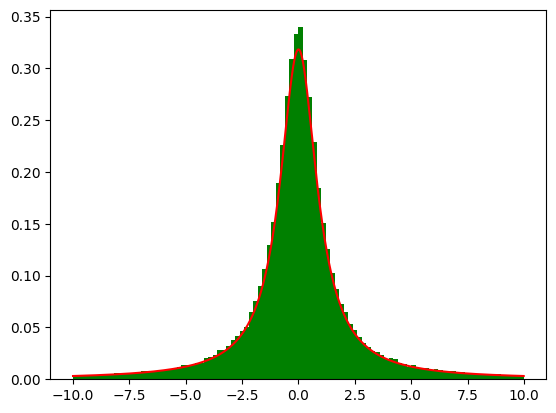

In [5]:
np.random.seed(seed_index)
Sample=np.random.uniform(0,1,100000)
def inverse_cauchy(y):
    return np.tan(np.pi*(y-0.5))
Y=inverse_cauchy(Sample)
data=np.arange(-10,10,0.01)
plt.plot(data,1/(np.pi*(1+data**2)),'r-')
plt.hist(Y,range=(-10,10),density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

### 用库函数生成Cauchy分布的随机数

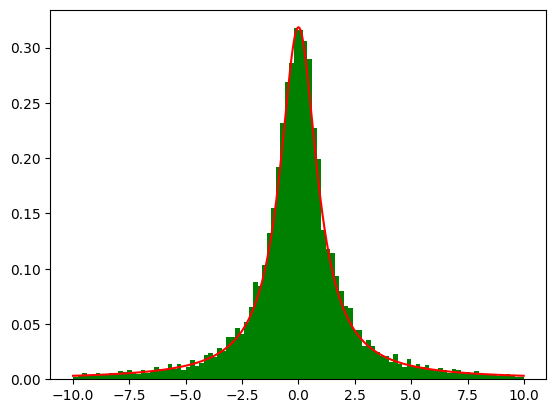

In [6]:
np.random.seed(seed_index)
std_Y=np.random.standard_cauchy(10000)
data=np.arange(-10,10,0.01)
plt.plot(data,1/(np.pi*(1+data**2)),'r-')
plt.hist(std_Y,range=(-10,10),density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

### 逆变换法生成Weibull分布的随机数

In [7]:
alpha,eta=2,4

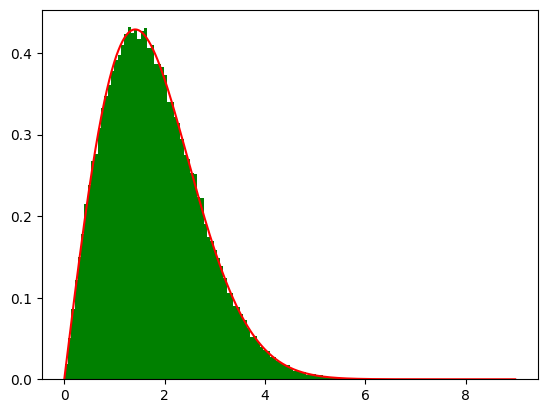

In [8]:
np.random.seed(seed_index)
Sample=np.random.uniform(0,1,100000)
def inverse_weibull(y):
    return np.power(-eta*np.log(y),1/alpha)
Y=inverse_weibull(Sample)
data=np.arange(0,9,0.01)
plt.plot(data,alpha*(data**(alpha-1))*np.exp((-data**alpha)/eta)/eta,'r-')
plt.hist(Y,density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

### 用库函数生成Weibull分布的随机数

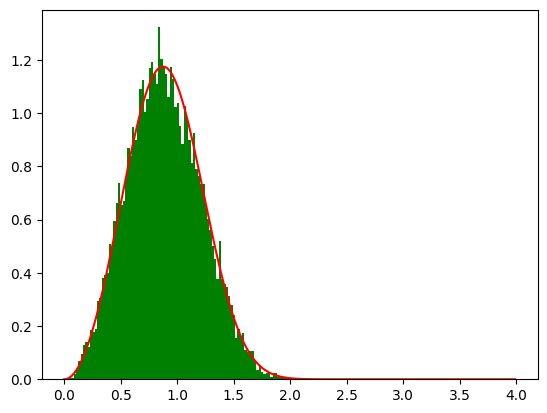

In [9]:
alpha,eta=3,1
np.random.seed(seed_index)
std_Y=np.random.weibull(a=alpha,size=10000)
data=np.arange(0,4,0.01)
plt.plot(data,alpha*(data**(alpha-1))*np.exp((-data**alpha)/eta)/eta,'r-')
plt.hist(std_Y,density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

# 19

### 19.1
$F(x)$是$X$在$a<X<b$条件下的条件分布

### 19.2

因为F(x)为$X|X\in [a,b]$的密度函数，所以只要对X进行条件采样即可

# 23.1
逆变换法

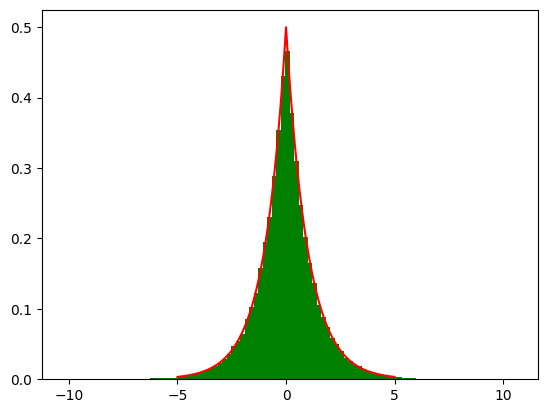

In [12]:
np.random.seed(seed_index)
data=np.random.uniform(0,1,100000)
def inverse_dual_exp(y):
    if y<0.5:
        return np.log(2*y)
    else:
        return -np.log(2-2*y)
Y=np.array([inverse_dual_exp(d) for d in data])
data1=np.arange(-5,5,0.01)
plt.plot(data1,0.5*np.exp(-np.abs(data1)),'r-')
plt.hist(Y,density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

# 23.2
复合法，混合模型

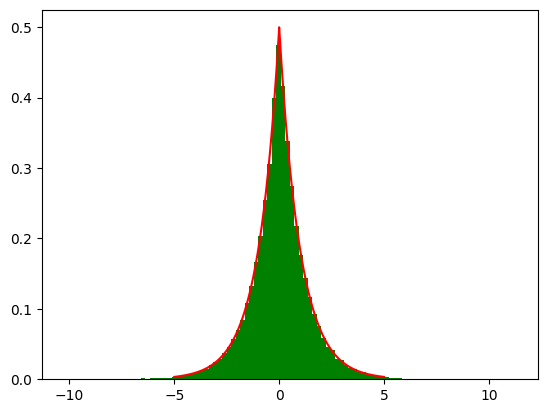

In [15]:
np.random.seed(seed_index)
data1=np.random.exponential(1,100000)
np.random.seed(seed_index2)
data2=-np.random.exponential(1,100000)
np.random.seed(np.random.randint(1))
data_iid=np.random.binomial(1,0.5,100000)
data_final=data_iid*data1+(1-data_iid)*data2
data_target=np.arange(-5,5,0.01)
plt.plot(data_target,0.5*np.exp(-np.abs(data_target)),'r-')
plt.hist(data_final,density=True,color='g',bins=100)
plt.show()

### 复合法（混合模型方法）

In [ ]:
np.random.seed(seed_index)
data1=np.random.uniform(0,1,100000)
np.random.seed(seed_index2)
data2=np.random.uniform(0,1,100000)
data2=np.sqrt(data2.copy())
np.random.seed(np.random.randint(1))
data_iid=np.random.binomial(1,0.5,100000)
data_final=data_iid*data1+(1-data_iid)*data2
data_target=np.arange(0,1,0.01)
plt.plot(data_target,data_target+0.5,'r-')
plt.hist(data_final,density=True,color='g',bins=100)#bins是分成多少个区间
plt.show()

# 3.11

In [ ]:
p1=0.5
N=100000
def generate_bi_normal(p1,N):
    p2=1-p1
    np.random.seed(seed_index)
    np.random.randn(N)
    np.random.seed(seed_index2)
    np.random.randn(N)+3
    np.random.seed(np.random.randint(1))
    data_iid=np.random.binomial(1,p1,N)
    data_final=data_iid*np.random.randn(N)+(1-data_iid)*(np.random.randn(N)+3)
    data_target=np.arange(-8,8,0.01)
    plt.plot(data_target,(p1*np.exp(-data_target**2/2)+(1-p1)*np.exp(-(data_target-3)**2/2))/(np.sqrt(2*np.pi)),'r-')
    plt.hist(data_final,density=True,color='g',bins=200)#bins是分成多少个区间
    plt.title('p1='+str(p1))
    plt.show()
for p1 in np.arange(0.1,1,0.2):
    generate_bi_normal(p1,N)

# 3.14

In [ ]:
conv_mat=np.array([[1,-0.5,0.5],[-0.5,1,-0.5],[0.5,-0.5,1]])
conv_mat

In [ ]:
A=np.linalg.cholesky(conv_mat)
A.dot(A.T)

In [ ]:
np.random.seed(seed_index)
raw_data=np.random.randn(3*N).reshape(N,3)
raw_data

In [ ]:
import pandas as pd
miu=np.array([np.array([0,1,2]) for i in range(N)])
miu

In [ ]:
data=raw_data.dot(A.T)+miu
data_target=np.arange(-5,6,0.01)
for i in range(3):
    plt.plot(data_target,np.exp(-(data_target-miu[0,i])**2/2)/np.sqrt(2*np.pi),'r-')
    plt.hist(data[:,i],density=True,color='g',bins=100)#bins是分成多少个区间
    plt.show()

In [ ]:
#相关系数
np.corrcoef(data.T)

In [ ]:
#data[:,:2]的散点图
plt.scatter(data[:,0],data[:,1],s=0.01)
plt.show()
plt.scatter(data[:,1],data[:,2],s=0.01)
plt.show()
plt.scatter(data[:,0],data[:,2],s=0.01)
plt.show()